### Import bibliotek

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sklearn.__version__

'0.22.1'

### Wygenerowanie danych

In [9]:
data, target = make_regression(n_samples=200, n_features=1, noise=20)
target = target ** 2

print(f'{data[:5]}\n')
print(target[:5])

[[ 0.472397]
 [ 1.051783]
 [-0.875525]
 [-0.448027]
 [-2.339593]]

[ 6316.888229 12197.922227  5767.101402    19.056809 29508.313336]


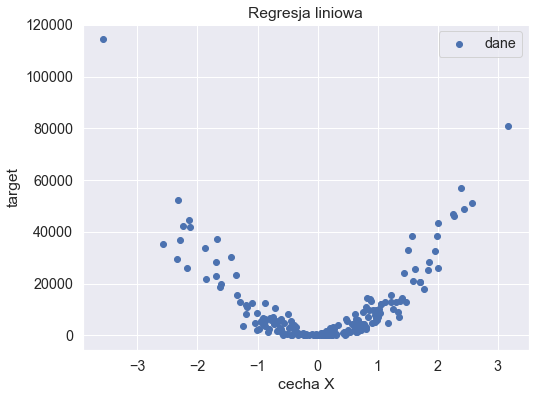

In [11]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.scatter(data, target, label='dane')
plt.legend()
plt.show()

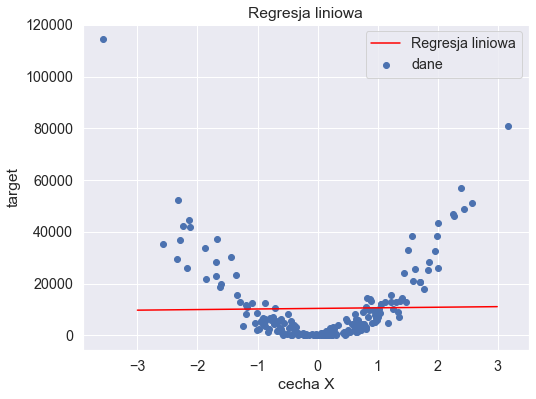

In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

plot_data = np.arange(-3, 3, .01).reshape(-1, 1)

plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.scatter(data, target, label='dane')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='Regresja liniowa')
plt.legend()
plt.show()

### Regresja drzew decyzyjnych

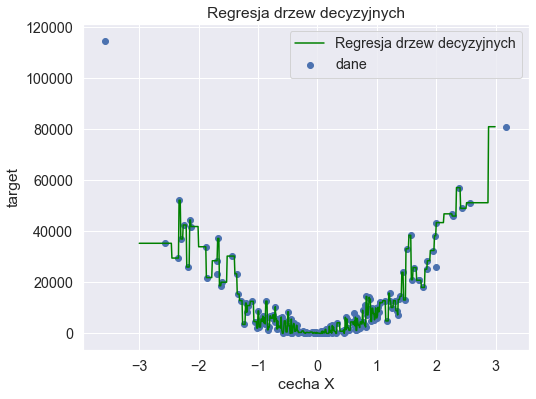

In [17]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(data,target)

plt.figure(figsize=(8,6))
plt.title('Regresja drzew decyzyjnych')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label='Regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.show()

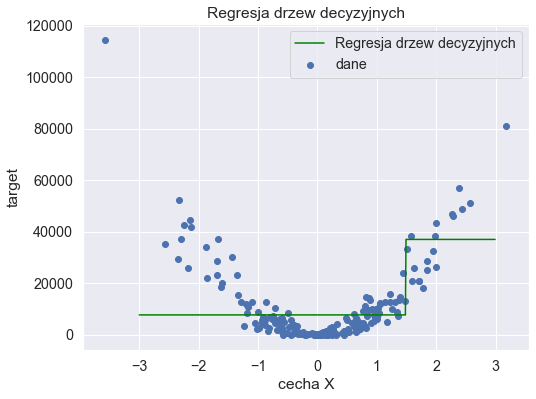

In [18]:
max_depth = 1
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data,target)

plt.figure(figsize=(8,6))
plt.title('Regresja drzew decyzyjnych')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label='Regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.show()

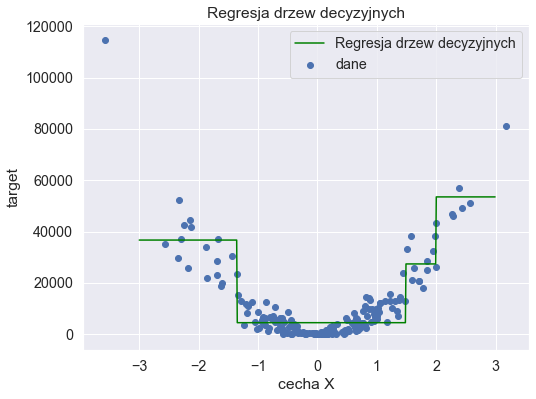

In [19]:
max_depth = 2
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data,target)

plt.figure(figsize=(8,6))
plt.title('Regresja drzew decyzyjnych')
plt.xlabel('cecha X')
plt.ylabel('target')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label='Regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.show()

### Graf drzewa decyzyjnego

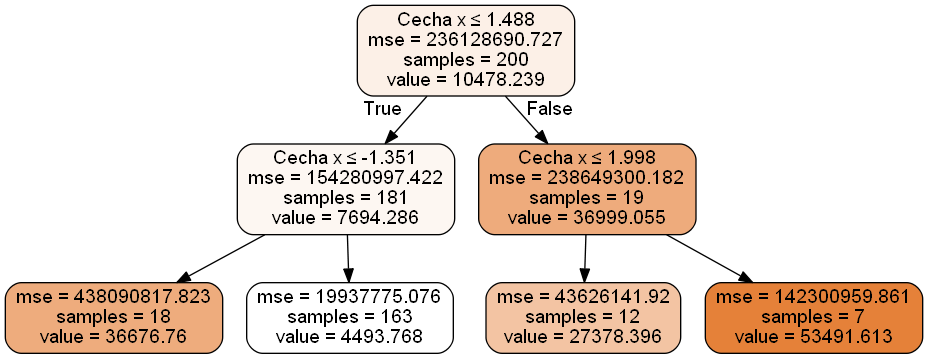

In [25]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['Cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)

### Model drzewa decyzyjnego = budowa funkcji

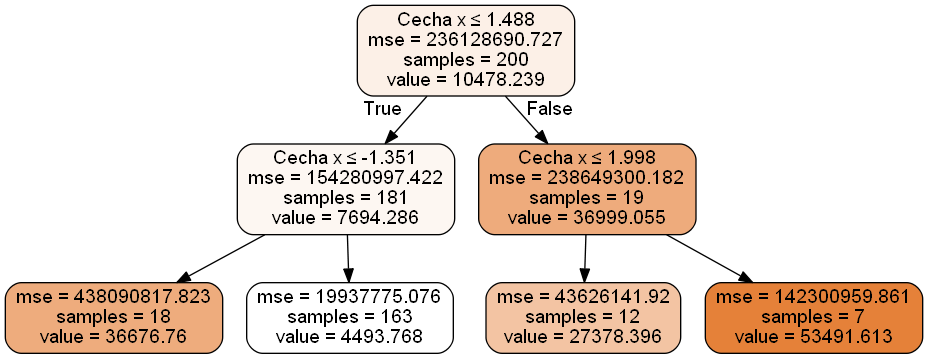

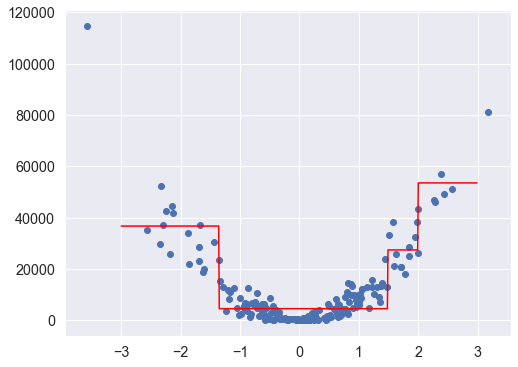

In [27]:
def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data, target)
    
    plt.figure(figsize=(8, 6))
    plt.plot(plot_data, regressor.predict(plot_data), c='red')
    plt.scatter(data, target)
    
    dot_data = StringIO()
    export_graphviz(regressor, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['Cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    
    return Image(graph.create_png(), width=300 + max_depth * 100)

make_dt_regression(2)

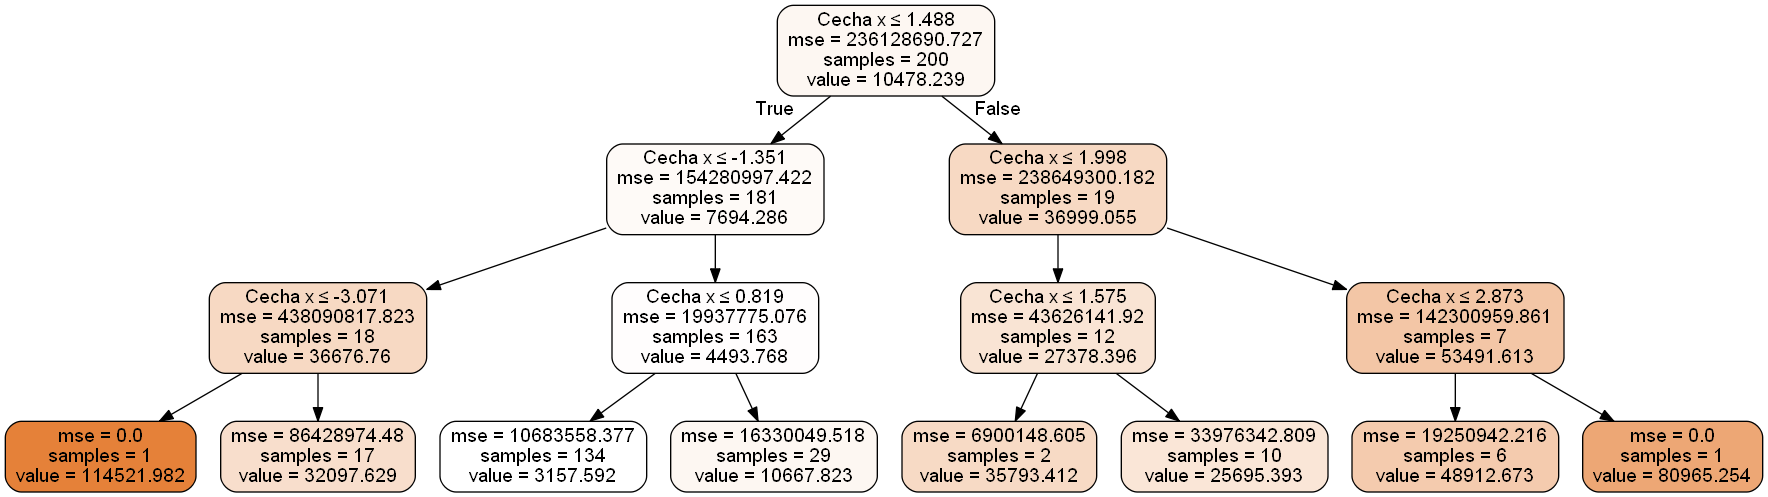

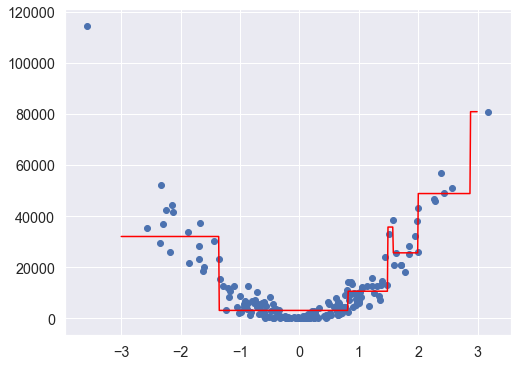

In [28]:
make_dt_regression(3)

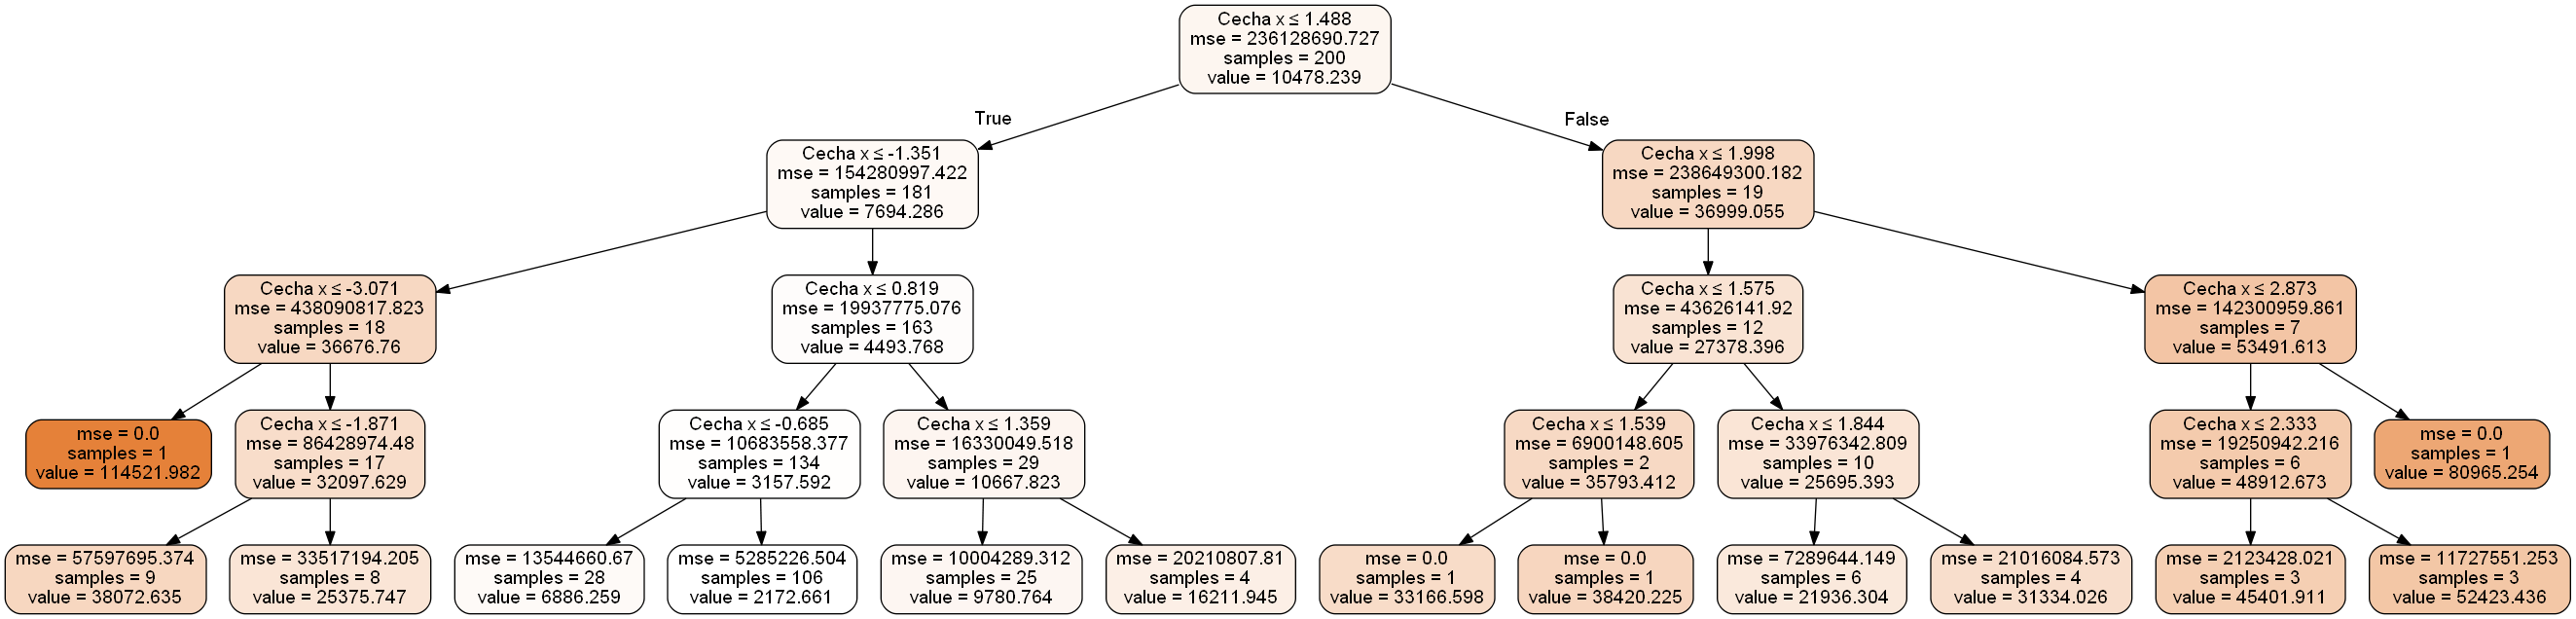

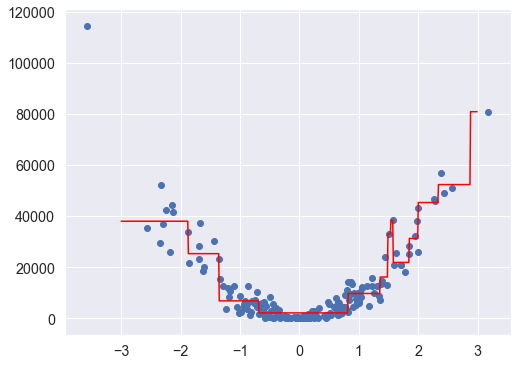

In [29]:
make_dt_regression(4)